In [1]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\var-al


<IPython.core.display.Javascript object>


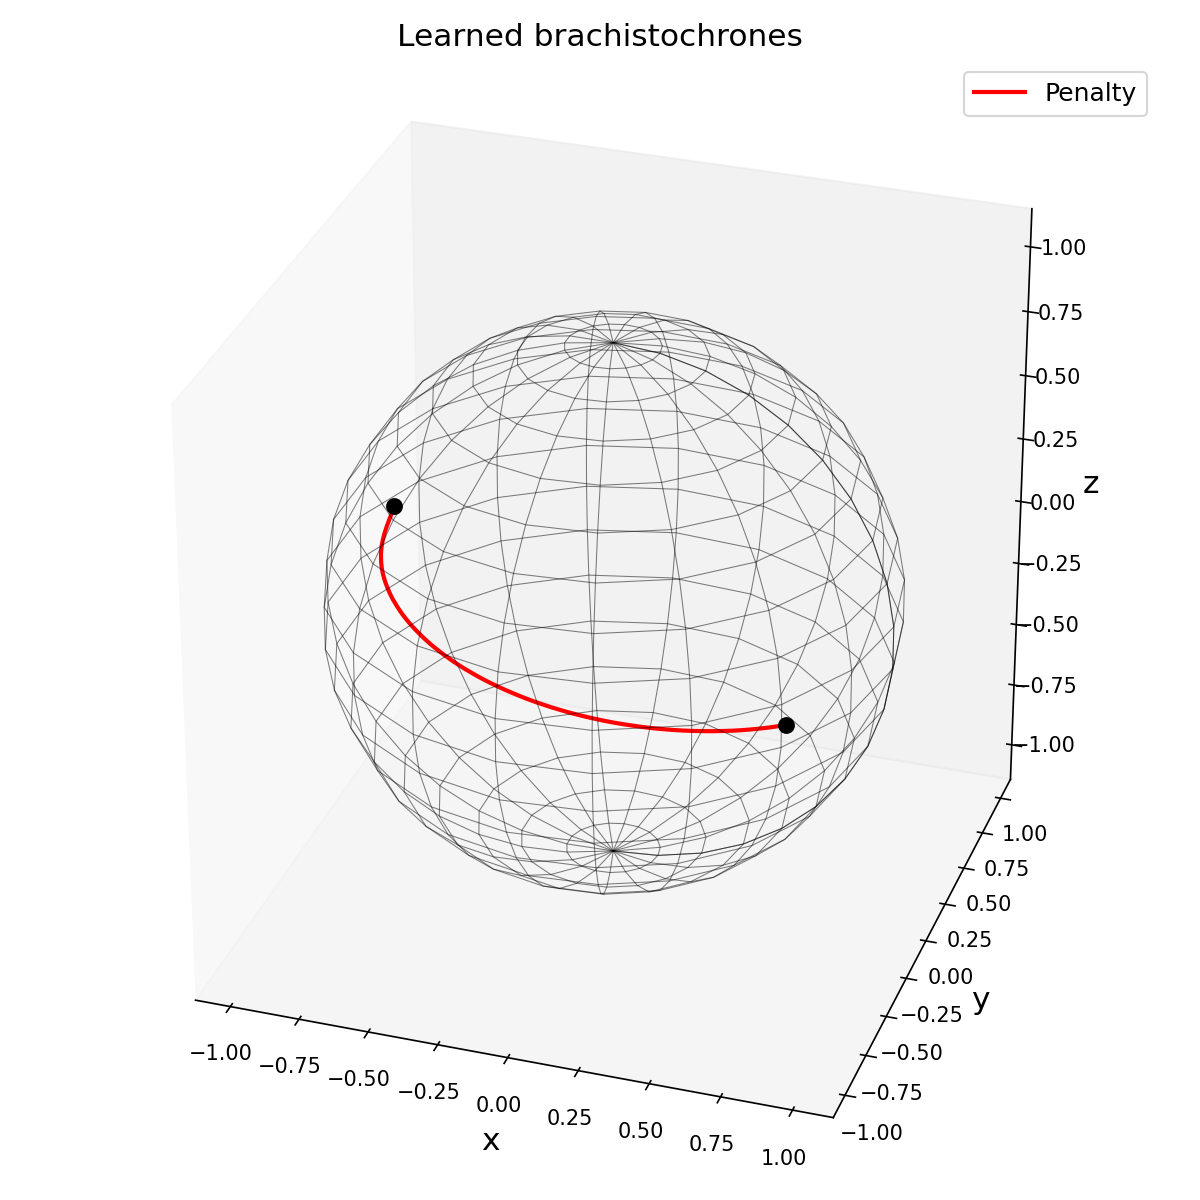

In [21]:
net_p = arch.VanillaNet(50, 3, DTYPE, name="sphere-brac_ref")
net_p.load_weights('../data/sphere-brac_ref/{}'.format(net_p.name)).expect_partial()

# net_al = arch.VanillaNet(50, 3, DTYPE, name='helicoid-al')
# net_al.load_weights('../data/helicoid-al/{}'.format(net_al.name)).expect_partial()

# set up plotting parameters
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# plot solutions
filename='../plots/sphere-brac_ref'
resolution=20
fig = plt.figure(figsize=(8, 8))
ax_p = fig.add_subplot(111, projection='3d')

# plotting params  
ax_p.tick_params(axis='both', which='major', labelsize=tick_size)
ax_p.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_p.set_title('Learned brachistochrones', fontsize=title_size)
ax_p.set_xlabel('x', fontsize=xlabel_size)
ax_p.set_ylabel('y', fontsize=ylabel_size)
ax_p.set_zlabel('z', fontsize=ylabel_size)
root2 = np.sqrt(2., dtype=DTYPE)
root3 = np.sqrt(3., dtype=DTYPE)

v1 = np.array([-1, -1, 1 ], dtype=DTYPE) / root3
z, x = 0.0, 0.8
v2 = np.array([x, -np.sqrt((1-z**2-x**2)), z], dtype=DTYPE) 
w = v2 - np.dot(v1, v2)*v1
w = w/np.linalg.norm(w, ord=2)

alpha = np.arccos(v1[2], dtype=DTYPE)
phi_0 = np.arctan2(v1[1], v1[0], dtype=DTYPE) 
if phi_0 < 0:
    phi_0 += 2.*np.pi
beta = np.arccos(v2[2], dtype=DTYPE)
phi_1 = np.arctan2(v2[1], v2[0], dtype=DTYPE)
if phi_1 < 0:
    phi_1 += 2.*np.pi
gamma = np.arccos(np.dot(v1, v2), dtype=DTYPE)
p = np.linspace(0., 2.*np.pi, num=resolution, endpoint=True).astype(DTYPE)
t = np.linspace(0., np.pi, num=resolution, endpoint=True).astype(DTYPE)

p0, t0 = np.meshgrid(p, t)
p1 = np.ones_like(t)

c, s = np.cos(t0), np.sin(t0)
c1, s1 = np.cos(t), np.sin(t)
xs, ys, zs = s*np.cos(p0), s*np.sin(p0), c

ax_p.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs))) 
ax_p.plot_wireframe(xs, ys, zs, color='black', alpha=0.5, linewidth=0.5)
ax_p.scatter(v1[0], v1[1], v1[2], color='black', s=50)
ax_p.scatter(v2[0], v2[1], v2[2], color='black', s=50)

t1 = np.linspace(alpha, beta, num=100, endpoint=True).astype(DTYPE)
c1, s1 = np.cos(t1), np.sin(t1)

#     net_p.load_weights('../data/sphere-geodesic/{}'.format(net_p.name)).expect_partial()
z_p = net_p(t1.reshape(-1, 1)).numpy()
phi = z_p.flatten()
ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, color='red', linewidth=2., label='Penalty')

#     net_p.load_weights('../data/sphere-geodesic-al/{}'.format(net_p.name)).expect_partial()
#     z_p = net_p(t1.reshape(-1, 1)).numpy()
#     phi = z_p.flatten()
#     ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, color='black', linewidth=2, label='Augmented Lagrangian', linestyle='--')
ax_p.grid(False)
ax_p.legend(fontsize=legend_size-3)

fig.tight_layout()
plt.savefig('{}.png'.format(filename), dpi=300)
plt.show()